
TFG

Este es el codigo del tfg de Borja Jimeno

En esta primera celda vamos a definir todas las funciones y variables que necesitaremos para calcular el ritmo teórico. Cada función está explicada al inicio y cada variable tiene asociadas sus unidades en un comentario a la derecha.  

Para la realización de las funciones se ha tomado como referencia:  
-El pdf ('rateTutorial_MMartinez_TAE25.pdf)    
-El capítulo 7 de la Tesis de María ('tesisMaria_chap7.pdf')   
-El artículo 'Inelastic and Elastic Scattering of 187-Mev Electrons from Selected Even-Even Nuclei - Richard Helm - PHISICAL REVIEW VOLUME 104, NUMBER 5 DECEMBER 1, 1956'  
-Para calcular el Quenching Factor, Sección 4.3.2 de la tesis de Tamara Pardo Yanguas ('Tesis-Tamara.pdf')

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy import special
from scipy.stats import norm

from funciones_ritmo_teorico import*
from funciones_ritmo_exp import*


plt.rcParams['font.size'] = 18



/tmp/ipykernel_46294/40686469.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
/tmp/ipykernel_46294/40686469.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


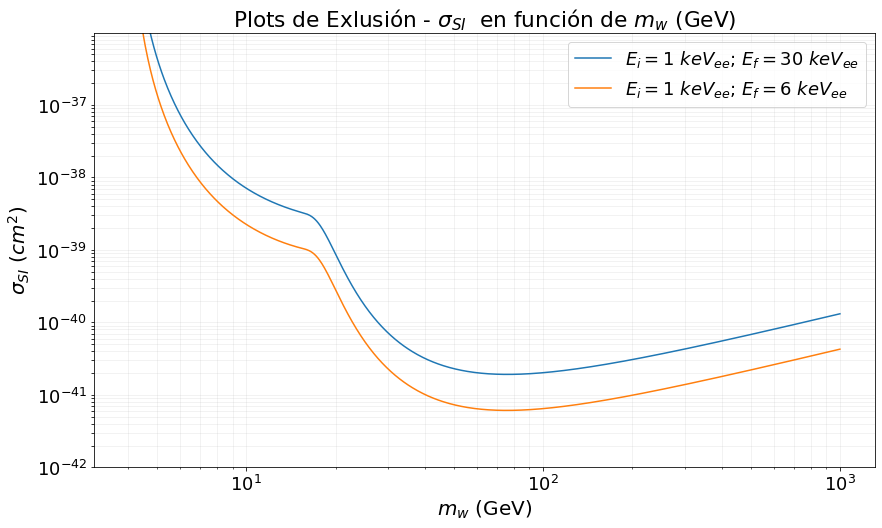

In [ ]:

timeMax=72.9 
timeMin=255.5 
timeAvg=(timeMax+timeMin)/2.

mW_min=0.1 #masa wimp minima en GeV
mW_max=3

mWs=np.logspace(mW_min,mW_max,num=1000,endpoint=True)

plt.figure(figsize=(14, 8))
ax = plt.subplot()

tiempo_exposicion=calcula_t_exposicion()
masa_exposicion=calcula_m_exposicion()

#Calculamos función Ritmo teorico

Ei=1
Ef=30

ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion)


sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])

ax.plot(mWs,sigma_sis,label="$E_i=$"+f"{Ei}"+" $keV_{ee}$; $E_f=$"+f"{Ef}"+" $keV_{ee}$")

Ei=1
Ef=6

ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])

ax.plot(mWs,sigma_sis,label="$E_i=$"+f"{Ei}"+" $keV_{ee}$; $E_f=$"+f"{Ef}"+" $keV_{ee}$")
ax.legend()
ax.set_title(r'Plots de Exlusión - $\sigma_{SI}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SI}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-36
y_inf=1e-42

ax.set_ylim(y_inf,y_sup)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)


/tmp/ipykernel_46294/2399361449.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
/tmp/ipykernel_46294/2399361449.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
/tmp/ipykernel_46294/2399361449.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
/tmp/ipykernel_46294/2399361449.py:39: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


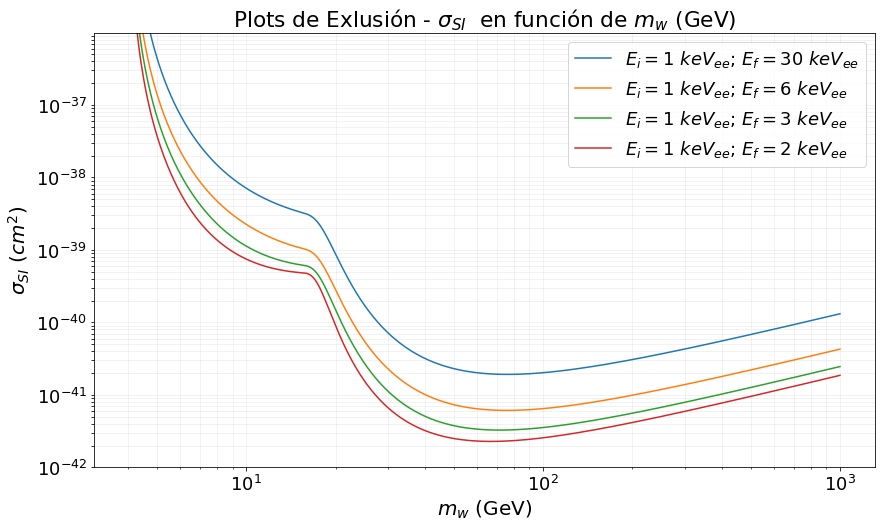

In [3]:

timeMax=72.9 
timeMin=255.5 
timeAvg=(timeMax+timeMin)/2.

mW_min=0.1 #masa wimp minima en GeV
mW_max=3

mWs=np.logspace(mW_min,mW_max,num=1000,endpoint=True)

plt.figure(figsize=(14, 8))
ax = plt.subplot()

tiempo_exposicion=calcula_t_exposicion()
masa_exposicion=calcula_m_exposicion()
#Calculamos función Ritmo teorico

Ei=1
Ef=30
ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
ax.plot(mWs,sigma_sis,label="$E_i=$"+f"{Ei}"+" $keV_{ee}$; $E_f=$"+f"{Ef}"+" $keV_{ee}$")


Ei=1
Ef=6
ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
ax.plot(mWs,sigma_sis,label="$E_i=$"+f"{Ei}"+" $keV_{ee}$; $E_f=$"+f"{Ef}"+" $keV_{ee}$")

Ei=1
Ef=3
ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
ax.plot(mWs,sigma_sis,label="$E_i=$"+f"{Ei}"+" $keV_{ee}$; $E_f=$"+f"{Ef}"+" $keV_{ee}$")

Ei=1
Ef=2
ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
ax.plot(mWs,sigma_sis,label="$E_i=$"+f"{Ei}"+" $keV_{ee}$; $E_f=$"+f"{Ef}"+" $keV_{ee}$")



ax.legend()
ax.set_title(r'Plots de Exlusión - $\sigma_{SI}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SI}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-36
y_inf=1e-42

ax.set_ylim(y_inf,y_sup)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)


/tmp/ipykernel_46294/1665130954.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
/tmp/ipykernel_46294/1665130954.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
/tmp/ipykernel_46294/1665130954.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


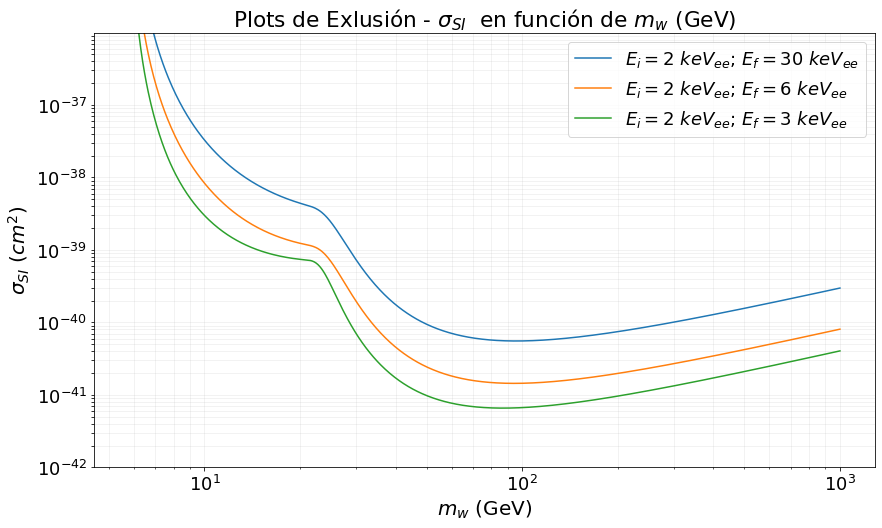

In [4]:

timeMax=72.9 
timeMin=255.5 
timeAvg=(timeMax+timeMin)/2.

mW_min=0.1 #masa wimp minima en GeV
mW_max=3

mWs=np.logspace(mW_min,mW_max,num=1000,endpoint=True)

plt.figure(figsize=(14, 8))
ax = plt.subplot()

tiempo_exposicion=calcula_t_exposicion()
masa_exposicion=calcula_m_exposicion()
#Calculamos función Ritmo teorico


Ei=2
Ef=30
ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
ax.plot(mWs,sigma_sis,label="$E_i=$"+f"{Ei}"+" $keV_{ee}$; $E_f=$"+f"{Ef}"+" $keV_{ee}$")

Ei=2
Ef=6
ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
ax.plot(mWs,sigma_sis,label="$E_i=$"+f"{Ei}"+" $keV_{ee}$; $E_f=$"+f"{Ef}"+" $keV_{ee}$")

Ei=2
Ef=3
ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
ax.plot(mWs,sigma_sis,label="$E_i=$"+f"{Ei}"+" $keV_{ee}$; $E_f=$"+f"{Ef}"+" $keV_{ee}$")

ax.legend()
ax.set_title(r'Plots de Exlusión - $\sigma_{SI}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SI}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-36
y_inf=1e-42

ax.set_ylim(y_inf,y_sup)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)


/tmp/ipykernel_46294/3894867926.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
/tmp/ipykernel_46294/3894867926.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


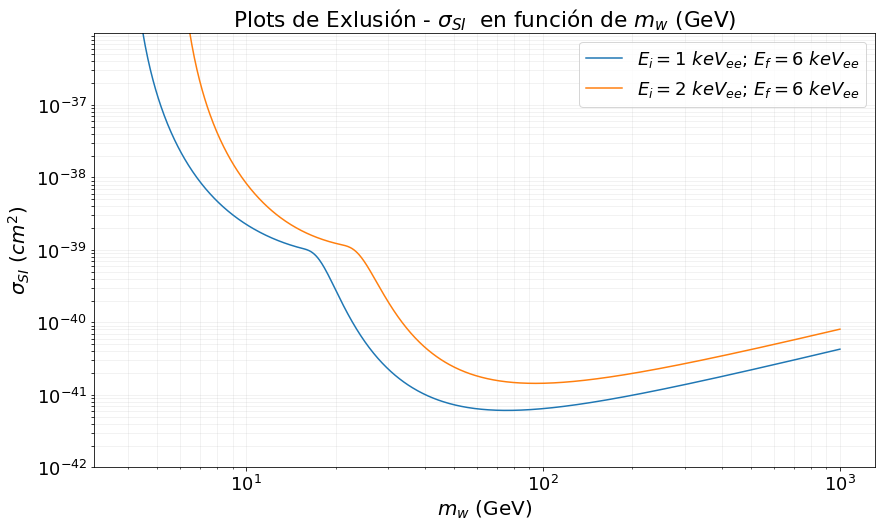

In [6]:

timeMax=72.9 
timeMin=255.5 
timeAvg=(timeMax+timeMin)/2.

mW_min=0.1 #masa wimp minima en GeV
mW_max=3

mWs=np.logspace(mW_min,mW_max,num=1000,endpoint=True)

plt.figure(figsize=(14, 8))
ax = plt.subplot()

tiempo_exposicion=calcula_t_exposicion()
masa_exposicion=calcula_m_exposicion()
#Calculamos función Ritmo teorico

Ei=1
Ef=6
ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
ax.plot(mWs,sigma_sis,label="$E_i=$"+f"{Ei}"+" $keV_{ee}$; $E_f=$"+f"{Ef}"+" $keV_{ee}$")


Ei=2
Ef=6
ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
ax.plot(mWs,sigma_sis,label="$E_i=$"+f"{Ei}"+" $keV_{ee}$; $E_f=$"+f"{Ef}"+" $keV_{ee}$")





ax.legend()
ax.set_title(r'Plots de Exlusión - $\sigma_{SI}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SI}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-36
y_inf=1e-42

ax.set_ylim(y_inf,y_sup)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)


/tmp/ipykernel_46294/1663934114.py:25: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
/tmp/ipykernel_46294/1663934114.py:34: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
/tmp/ipykernel_46294/1663934114.py:45: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
/tmp/ipykernel_46294/1663934114.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


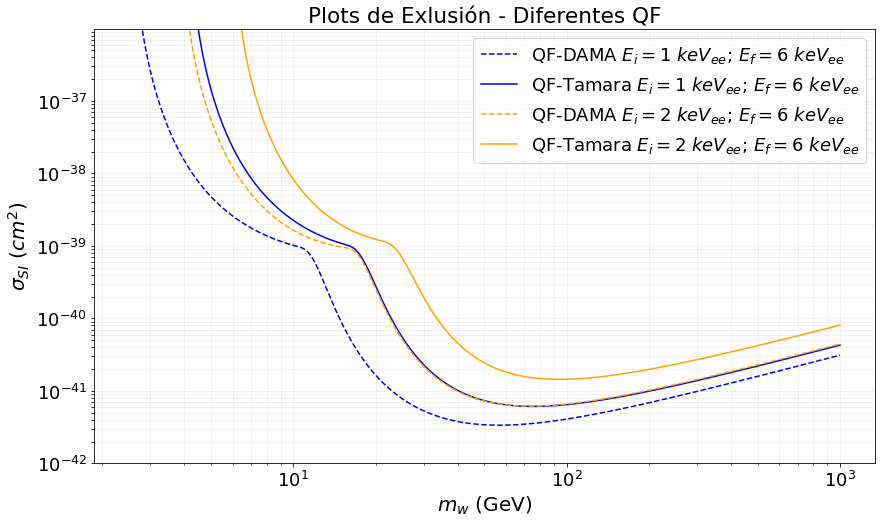

In [5]:

from matplotlib.ticker import LogLocator, LogFormatter
from matplotlib.ticker import FuncFormatter
timeMax=72.9 
timeMin=255.5 
timeAvg=(timeMax+timeMin)/2.

mW_min=0.1 #masa wimp minima en GeV
mW_max=3

mWs=np.logspace(mW_min,mW_max,num=1000,endpoint=True)
plt.ion()
plt.figure(figsize=(14, 8))
ax = plt.subplot()

#Calculamos función Ritmo teorico


Ei=1
Ef=6

tiempo_exposicion=calcula_t_exposicion()
masa_exposicion=calcula_m_exposicion()

ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


ax.plot(mWs,sigma_sis,c='blue',ls='--',label="QF-DAMA"+" $E_i=$"+f"{Ei}"+" $keV_{ee}$; $E_f=$"+f"{Ef}"+" $keV_{ee}$")

tiempo_exposicion=calcula_t_exposicion()
masa_exposicion=calcula_m_exposicion()

ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])

ax.plot(mWs,sigma_sis,c='blue',label="QF-Tamara"+" $E_i=$"+f"{Ei}"+" $keV_{ee}$; $E_f=$"+f"{Ef}"+" $keV_{ee}$")

Ei=2
Ef=6

tiempo_exposicion=calcula_t_exposicion()
masa_exposicion=calcula_m_exposicion()

ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


ax.plot(mWs,sigma_sis,c='orange',ls='--',label="QF-DAMA"+" $E_i=$"+f"{Ei}"+" $keV_{ee}$; $E_f=$"+f"{Ef}"+" $keV_{ee}$")

tiempo_exposicion=calcula_t_exposicion()
masa_exposicion=calcula_m_exposicion()

ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])

ax.plot(mWs,sigma_sis,c='orange',label="QF-Tamara"+" $E_i=$"+f"{Ei}"+" $keV_{ee}$; $E_f=$"+f"{Ef}"+" $keV_{ee}$")



ax.legend()
ax.set_title(r'Plots de Exlusión - Diferentes QF')
ax.set_ylabel(r'$\sigma_{SI}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-36
y_inf=1e-42

ax.set_ylim(y_inf,y_sup)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)
